In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Loading and Cleaning Data

In [6]:
retail_df = pd.read_csv('retail_dataset_II.csv', index_col=0)
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [7]:
retail_df.shape

(525461, 8)

In [9]:
retail_df.columns = retail_df.columns.str.lower().str.replace(' ', '_')

In [11]:
retail_df.rename(columns={'price':'unit_price'}, inplace=True)

In [12]:
retail_df.isna().sum()

invoice             0
stockcode           0
description      2928
quantity            0
invoicedate         0
unit_price          0
customer_id    107927
country             0
dtype: int64

In [13]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoice      525461 non-null  object 
 1   stockcode    525461 non-null  object 
 2   description  522533 non-null  object 
 3   quantity     525461 non-null  int64  
 4   invoicedate  525461 non-null  object 
 5   unit_price   525461 non-null  float64
 6   customer_id  417534 non-null  float64
 7   country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.1+ MB


In [14]:
retail_df.describe()

,quantity,unit_price,customer_id
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


- There are some odd values in data.
- quantity and unit price columns have some negative values
- max value of quantity is 19152 (seems impossible)
- Additionally, the maximum value of unit price is 25111, which is plausible, but seems unlikely.

In [20]:
retail_df.loc[retail_df.unit_price==25111.09]

,invoice,stockcode,description,quantity,invoicedate,unit_price,customer_id,country
241824,C512770,M,Manual,-1,17/06/2010 16:52,25111.09,17399.0,United Kingdom
241827,512771,M,Manual,1,17/06/2010 16:53,25111.09,NaN,United Kingdom


In [21]:
retail_df.loc[retail_df['unit_price'] == -53594.360000]

,invoice,stockcode,description,quantity,invoicedate,unit_price,customer_id,country
179403,A506401,B,Adjust bad debt,1,29/04/2010 13:36,-53594.36,NaN,United Kingdom


In [22]:
(retail_df.unit_price <= 0).sum()

3690

In [23]:
(retail_df.quantity <= 0).sum()

12326

In [24]:
((retail_df.unit_price <=0) & (retail_df.quantity<=0) & (retail_df.customer_id.isna())).sum()

2121

In [25]:
condition = (retail_df.unit_price <=0) & (retail_df.quantity<=0) & (retail_df.customer_id.isna())

new_retail = retail_df.loc[~condition]
new_retail.describe()

,quantity,unit_price,customer_id
count,523340.000000,523340.000000,417534.000000
mean,11.079163,4.707837,15360.645478
std,96.653187,146.422422,1680.811316
min,-9360.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [26]:
new_retail.shape

(523340, 8)

In [27]:
new_retail.isna().sum()

invoice             0
stockcode           0
description      1101
quantity            0
invoicedate         0
unit_price          0
customer_id    105806
country             0
dtype: int64

In [28]:
((new_retail.customer_id.isna()) & (new_retail.unit_price<=0)).sum()

1538

In [31]:
mask = (new_retail.customer_id.isna()) & (new_retail.unit_price<=0)

new_retail = new_retail.loc[~mask]
new_retail.isna().sum()

invoice             0
stockcode           0
description         0
quantity            0
invoicedate         0
unit_price          0
customer_id    104268
country             0
dtype: int64

In [36]:
new_retail = new_retail.loc[~(new_retail.quantity<=0)]

In [38]:
new_retail = new_retail.loc[~(new_retail.unit_price<=0)]

In [40]:
new_retail.isna().sum()

invoice             0
stockcode           0
description         0
quantity            0
invoicedate         0
unit_price          0
customer_id    103902
country             0
dtype: int64

In [41]:
new_retail.shape

(511566, 8)

In [43]:
new_retail.dropna(inplace=True)

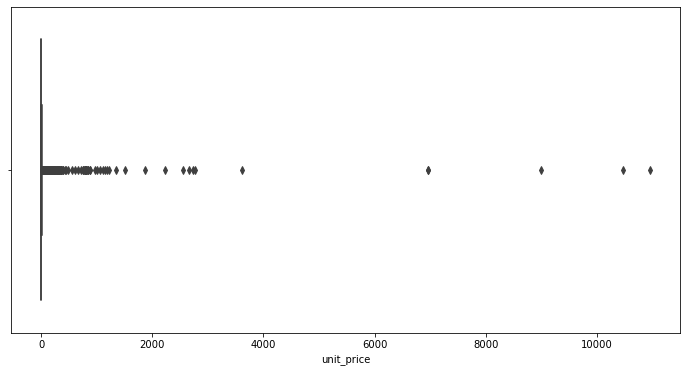

In [45]:
plt.rcParams['figure.figsize'] = [12, 6]

sns.boxplot(data=new_retail, x='unit_price')
plt.show()

In [50]:
new_retail = new_retail.loc[new_retail.unit_price<100]

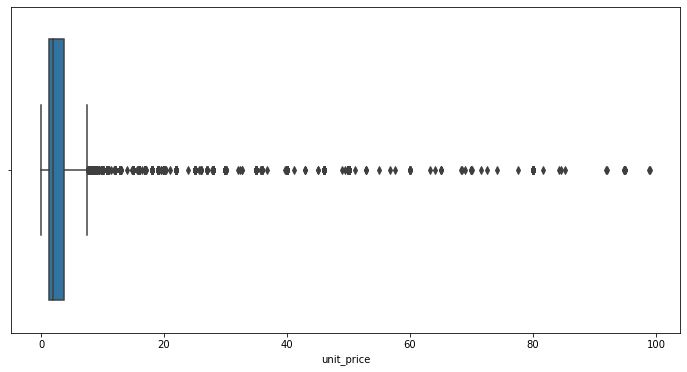

In [51]:
sns.boxplot(data=new_retail, x='unit_price')
plt.show()

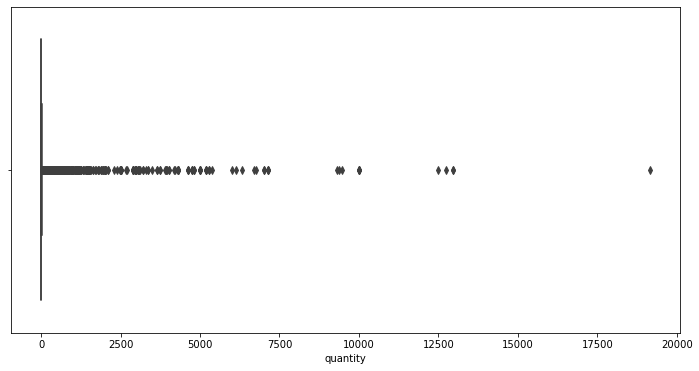

In [52]:
sns.boxplot(data=new_retail, x='quantity')
plt.show()

In [53]:
new_retail = new_retail.loc[new_retail.quantity<2500]

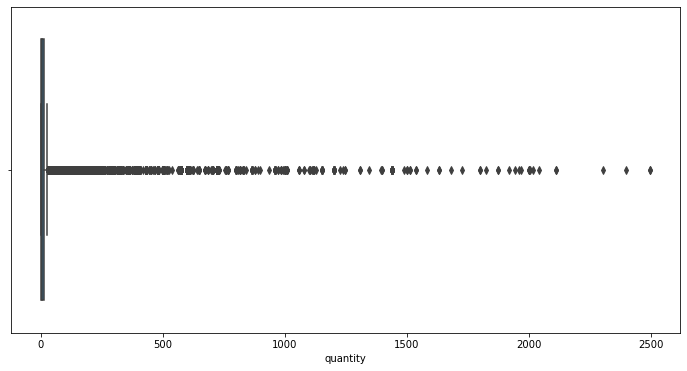

In [54]:
sns.boxplot(data=new_retail, x='quantity')
plt.show()

In [55]:
new_retail.shape

(407401, 8)

## Data Preprocessing

In [56]:
retail_df = new_retail
retail_df.head()

,invoice,stockcode,description,quantity,invoicedate,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [57]:
retail_df.describe(include='O').T

,count,unique,top,freq
invoice,407401,19093,500356,270
stockcode,407401,4012,85123A,3153
description,407401,4438,WHITE HANGING HEART T-LIGHT HOLDER,3153
invoicedate,407401,17914,07/03/2010 15:34,270
country,407401,37,United Kingdom,370785


In [59]:
retail_df.description = retail_df.description.str.lower()

In [61]:
retail_df.invoicedate = pd.to_datetime(retail_df.invoicedate)

In [65]:
retail_df.customer_id = retail_df.customer_id.astype('int')

In [66]:
retail_df.head()

,invoice,stockcode,description,quantity,invoicedate,unit_price,customer_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-01-12 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,pink cherry lights,12,2009-01-12 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,white cherry lights,12,2009-01-12 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"record frame 7"" single size",48,2009-01-12 07:45:00,2.10,13085,United Kingdom
4,489434,21232,strawberry ceramic trinket box,24,2009-01-12 07:45:00,1.25,13085,United Kingdom


In [67]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407401 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      407401 non-null  object        
 1   stockcode    407401 non-null  object        
 2   description  407401 non-null  object        
 3   quantity     407401 non-null  int64         
 4   invoicedate  407401 non-null  datetime64[ns]
 5   unit_price   407401 non-null  float64       
 6   customer_id  407401 non-null  int32         
 7   country      407401 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


### Feature Ingineering

In [73]:
retail_df['year'] = retail_df.invoicedate.dt.year

retail_df['month'] = retail_df.invoicedate.dt.month

retail_df['day'] = retail_df.invoicedate.dt.day

retail_df['day_of_week'] = retail_df.invoicedate.dt.day_of_week + 1

retail_df['hour'] = retail_df.invoicedate.dt.hour


In [74]:
retail_df.head()

,invoice,stockcode,description,quantity,invoicedate,unit_price,customer_id,country,year,month,day,day_of_week,hour
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-01-12 07:45:00,6.95,13085,United Kingdom,2009,1,12,1,7
1,489434,79323P,pink cherry lights,12,2009-01-12 07:45:00,6.75,13085,United Kingdom,2009,1,12,1,7
2,489434,79323W,white cherry lights,12,2009-01-12 07:45:00,6.75,13085,United Kingdom,2009,1,12,1,7
3,489434,22041,"record frame 7"" single size",48,2009-01-12 07:45:00,2.10,13085,United Kingdom,2009,1,12,1,7
4,489434,21232,strawberry ceramic trinket box,24,2009-01-12 07:45:00,1.25,13085,United Kingdom,2009,1,12,1,7


In [75]:
retail_df['spent'] = retail_df.quantity * retail_df.unit_price

In [76]:
retail_df.head()

,invoice,stockcode,description,quantity,invoicedate,unit_price,customer_id,country,year,month,day,day_of_week,hour,spent
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-01-12 07:45:00,6.95,13085,United Kingdom,2009,1,12,1,7,83.4
1,489434,79323P,pink cherry lights,12,2009-01-12 07:45:00,6.75,13085,United Kingdom,2009,1,12,1,7,81.0
2,489434,79323W,white cherry lights,12,2009-01-12 07:45:00,6.75,13085,United Kingdom,2009,1,12,1,7,81.0
3,489434,22041,"record frame 7"" single size",48,2009-01-12 07:45:00,2.10,13085,United Kingdom,2009,1,12,1,7,100.8
4,489434,21232,strawberry ceramic trinket box,24,2009-01-12 07:45:00,1.25,13085,United Kingdom,2009,1,12,1,7,30.0


In [77]:
## columns repositioning

retail_df = retail_df[['invoice', 'country', 'customer_id', 'stockcode', 
                       'description','quantity', 'unit_price', 'invoicedate', 'spent', 
                    'year', 'month', 'day','day_of_week', 'hour']]

## Data Analysis

1. Which customers placed the most and fewest orders?
2. Which customers spent the most and least money?
3. Which months were the most and least popular for this online retail store?
4. Which dates of the month were the most and least popular for this online retail store?
5. Which days were the most and least popular for this online retail store?
6. Which hours of the day were most and least popular for this online retail store?
7. Which items were ordered the most and least?
8. Which countries placed the most and fewest orders?
9. Which countries spent the most and least money?

In [79]:
## Q.1

customer_data = retail_df.groupby(['customer_id'], as_index=False)['invoice'].count()

customer_data.head(5)

,customer_id,invoice
0,12346,33
1,12347,71
2,12348,20
3,12349,100
4,12351,21


In [80]:
# Top 10 customers in terms of order placing
customer_data.nlargest(n=10, columns=['invoice'])

,customer_id,invoice
1827,14911,5554
3970,17841,5043
1595,14606,3866
1261,14156,2640
247,12748,2627
3977,17850,2499
3017,16549,2269
2119,15311,2055
1626,14646,1772
1534,14527,1729


In [81]:
# bottom 10 customers in terms of order placing
customer_data.nsmallest(n=10, columns=['invoice'])

,customer_id,invoice
40,12404,1
81,12466,1
108,12503,1
140,12570,1
161,12606,1
317,12846,1
507,13096,1
513,13105,1
531,13128,1
564,13172,1


In [82]:
customer_data.describe()

,customer_id,invoice
count,4292.000000,4292.000000
mean,15352.568034,94.921016
std,1700.615697,202.267299
min,12346.000000,1.000000
25%,13887.000000,18.000000
50%,15355.000000,44.000000
75%,16836.500000,103.000000
max,18287.000000,5554.000000


In [179]:
spent_data = retail_df.groupby(['customer_id', 'quantity'], as_index=False)['spent'].sum()

spent_data.head()

,customer_id,quantity,spent
0,12346,1,170.36
1,12346,5,157.50
2,12346,10,45.00
3,12347,3,53.10
4,12347,4,109.00


In [180]:
spent_data.nlargest(10, 'spent')

,customer_id,quantity,spent
42617,18102,300,53124.00
18887,14911,12,32013.96
42601,18102,200,31108.00
42635,18102,600,27606.00
16761,14646,288,26712.00
16745,14646,96,25090.56
42584,18102,120,21967.20
40635,17850,6,20800.20
16750,14646,144,18914.40
18883,14911,6,18652.80


In [181]:
spent_data.nsmallest(10, 'spent')

,customer_id,quantity,spent
2118,12671,1,0.001
8625,13583,1,0.001
10044,13765,1,0.001
15218,14459,1,0.001
7323,13408,1,0.002
7219,13393,1,0.420
16641,14634,1,0.550
16969,14668,1,0.550
40003,17766,2,0.760
25944,15915,5,0.800


In [189]:
# Q.3 Which months were the most and least popular for this online retail store?

ord_data = retail_df.groupby(['year','month'])['invoice'].unique().apply(lambda x: x.size)
ord_data = ord_data.to_frame().reset_index()
ord_data.sort_values('invoice')

,year,month,invoice
4,2009,5,30
10,2009,11,65
5,2009,6,72
8,2009,9,76
3,2009,4,80
9,2009,10,86
6,2009,7,94
0,2009,1,96
7,2009,8,102
1,2009,2,110


In [132]:
# Q.4 Which day were the most and least popular for this online retail store?

ord_data = retail_df.groupby('day')['invoice'].unique().apply(lambda x: x.size)
ord_data

day
1      266
2      475
3      607
4      387
5      548
6      610
7      502
8      506
9      510
10     819
11    1028
12    1707
13     509
14     633
15     727
16     615
17     596
18     683
19     600
20     502
21     647
22     633
23     571
24     601
25     664
26     654
27     511
28     668
29     607
30     457
31     250
Name: invoice, dtype: int64

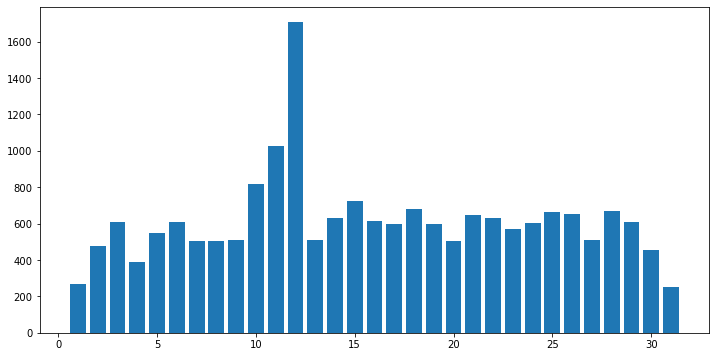

In [138]:
plt.bar(ord_data.index, ord_data)
plt.show()

In [142]:
plot_data = retail_df.groupby('day_of_week')['invoice'].unique().apply(lambda x: x.size)
plot_data

day_of_week
1    2885
2    3013
3    3106
4    3303
5    2500
6    1329
7    2957
Name: invoice, dtype: int64

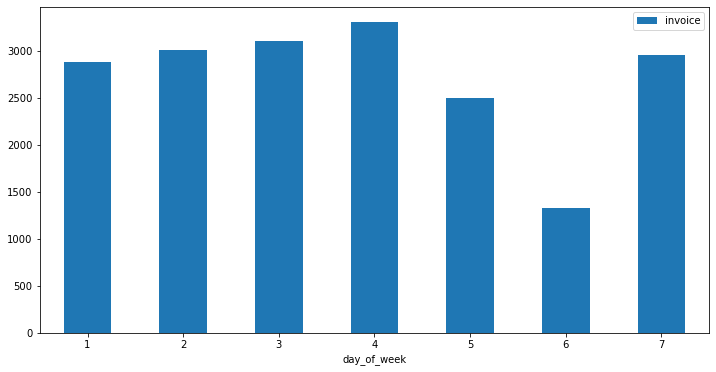

In [146]:
plot_data.to_frame().plot.bar(rot=0)
plt.show()

In [147]:
hour_data = retail_df.groupby('hour')['invoice'].unique().apply(lambda x: x.size)
hour_data

hour
7       49
8      444
9     1203
10    2214
11    2394
12    3158
13    2885
14    2349
15    2053
16    1239
17     629
18     257
19     185
20      34
Name: invoice, dtype: int64

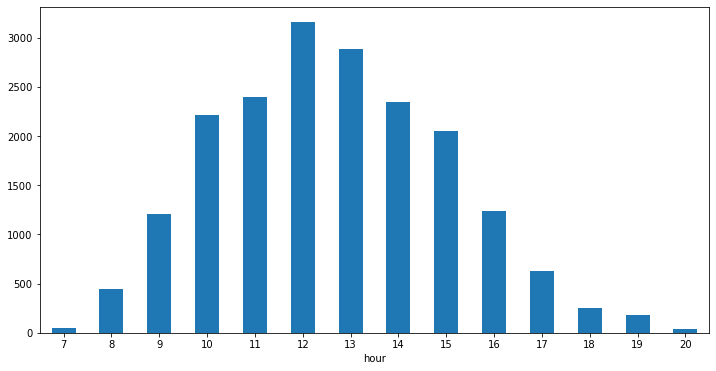

In [148]:
hour_data.plot.bar(rot=0)
plt.show()

In [150]:
# Which items were ordered the most and least?

items_data = retail_df.groupby('description', as_index=False)['quantity'].sum()
items_data

,description,quantity
0,doormat union jack guns and roses,169
1,3 stripey mice feltcraft,663
2,4 purple flock dinner candles,200
3,animal stickers,385
4,bank charges,2
...,...,...
4433,zinc heart lattice tray oval,325
4434,zinc metal heart decoration,13958
4435,zinc police box lantern,193
4436,zinc top 2 door wooden shelf,234


In [151]:
items_data.sort_values('quantity', ascending=False)

,description,quantity
4254,white hanging heart t-light holder,56915
2630,pack of 72 retro spot cake cases,45156
4360,world war 2 gliders asstd designs,44674
262,assorted colour bird ornament,41671
138,60 teatime fairy cake cases,35806
...,...,...
341,baroque butterfly earrings crystal,1
1465,fire polished glass bracelet red,1
3897,spotty cockerel doorstop,1
1787,green chenille shaggy c/cover,1


In [163]:
# Which countries placed the most and fewest orders?

countries_data = retail_df.groupby('country', as_index=False)['invoice'].count()
countries_data.sort_values('invoice', ascending=False)

,country,invoice
34,United Kingdom,370785
9,EIRE,8481
12,Germany,7649
11,France,5450
21,Netherlands,2726
28,Spain,1230
30,Switzerland,1169
3,Belgium,1033
25,Portugal,982
29,Sweden,865


- This store is based in the UK, so it seems obvious that customers in the UK would have placed the most orders. Remove the UK from ord_coun to see how the other countries are ordered.

In [168]:
countries_data_new = countries_data.loc[~(countries_data.country=='United Kingdom')]
countries_data_new = countries_data_new.sort_values('invoice', ascending=False)

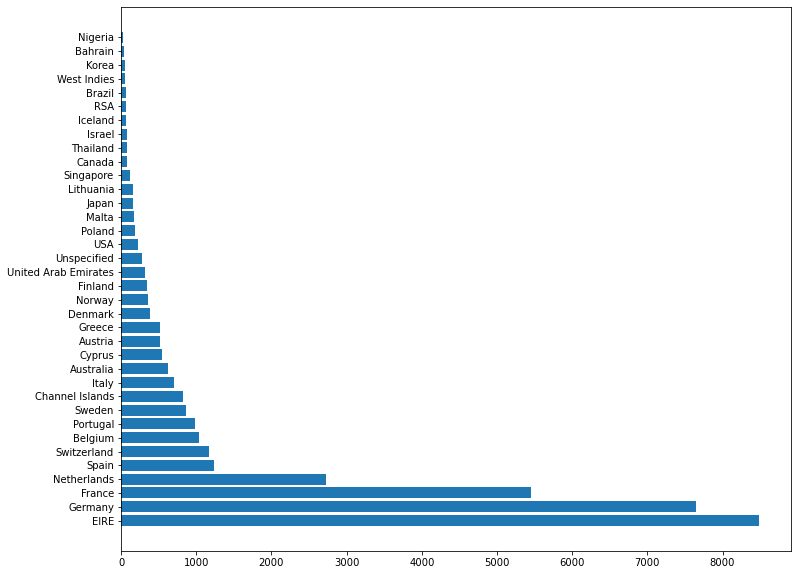

In [172]:
plt.figure(figsize=(12,10))
plt.barh(y=countries_data_new.country, width=countries_data_new.invoice)
plt.show()

In [173]:
total_spent = retail_df.groupby('country')['spent'].sum()
total_spent

country
Australia                 30388.350
Austria                   13154.330
Bahrain                     805.970
Belgium                   22573.430
Brazil                      268.270
Canada                     1216.660
Channel Islands           24256.320
Cyprus                    11389.750
Denmark                   21964.010
EIRE                     338764.500
Finland                    7379.460
France                   133462.760
Germany                  200723.301
Greece                    14335.670
Iceland                    1323.320
Israel                     3199.400
Italy                     14397.180
Japan                      9722.020
Korea                      1118.510
Lithuania                  4892.680
Malta                      2686.750
Netherlands              267779.320
Nigeria                     140.390
Norway                    10027.840
Poland                     3567.800
Portugal                  23608.090
RSA                         931.430
Singapore           

In [176]:
total_spent = total_spent.to_frame().sort_values('spent')
total_spent

,spent
country,
Nigeria,140.390
Brazil,268.270
West Indies,536.410
Bahrain,805.970
RSA,931.430
Korea,1118.510
Canada,1216.660
Iceland,1323.320
Malta,2686.750


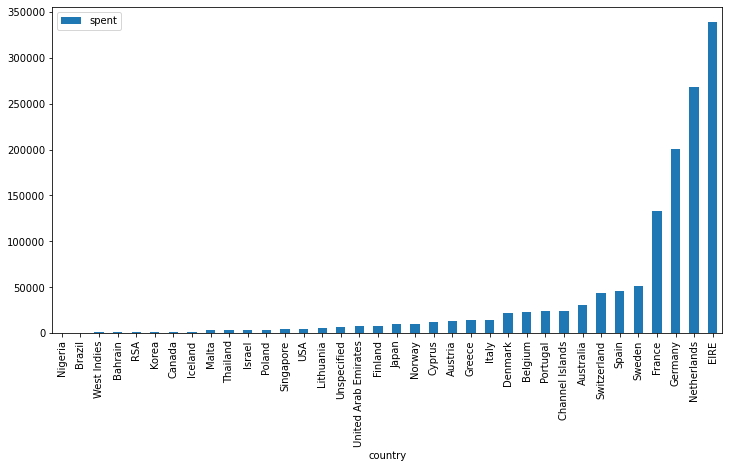

In [178]:
total_spent.drop(index=['United Kingdom']).plot.bar()
plt.show()